<a href="https://colab.research.google.com/github/Earnest07/Chatting-App-FS/blob/main/Income_Estimation_data_Sources.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Review


In [1]:
!pip install h5py

In [8]:
import h5py
import numpy as np
# from google.colab import files # No need to import if not uploading again in this run

# --- Step 1: File is already uploaded in your current session ---
# If your Colab session restarts, you would need to run the files.upload() part again,
# or better, mount Google Drive for persistent storage.
file_name = 'VNP46A2.A2023001.h00v03.002.2025135151839.h5' # The name of the file you just uploaded
file_path = f'/content/{file_name}' # Files uploaded directly go to /content/

print(f"Using uploaded file: {file_name} from {file_path}")

# --- Step 2: Ensure h5py is installed (usually pre-installed in Colab) ---
# !pip install h5py # Uncomment and run only if you get an error that h5py is not found

# --- Step 3: Inspect Your .h5 File Structure and Data ---
try:
    with h5py.File(file_path, 'r') as f:
        print(f"\n--- Exploring HDF5 file: {file_path} ---")

        # Function to recursively print group and dataset names
        def print_hdf5_structure(name, obj, indent=0):
            print('  ' * indent + f'- {name}: {obj.__class__.__name__}')
            if isinstance(obj, h5py.Group):
                for key, val in obj.items():
                    print_hdf5_structure(key, val, indent + 1)

        print("Keys (groups and datasets) in the HDF5 file:")
        f.visititems(print_hdf5_structure)

        # --- Corrected Example: Accessing the DNB_BRDF-Corrected_NTL dataset ---
        # Using the exact path found in your output: VIIRS_Grid_DNB_2d instead of VNP_Grid_DNB
        ntl_dataset_path = 'HDFEOS/GRIDS/VIIRS_Grid_DNB_2d/Data Fields/DNB_BRDF-Corrected_NTL' # Corrected path

        # You can also choose 'Gap_Filled_DNB_BRDF-Corrected_NTL' if you want that specific product
        # ntl_dataset_path = 'HDFEOS/GRIDS/VIIRS_Grid_DNB_2d/Data Fields/Gap_Filled_DNB_BRDF-Corrected_NTL'

        if ntl_dataset_path in f:
            ntl_data = f[ntl_dataset_path]
            print(f"\n--- Details for dataset: '{ntl_dataset_path}' ---")
            print(f"Shape (dimensions): {ntl_data.shape}")
            print(f"Data type: {ntl_data.dtype}")

            # Read a small subset of the data to avoid memory issues with large files
            # For example, the top-left 100x100 pixels.
            # The full dataset will be 4800x4800 pixels for a 500m tile.
            # Be cautious with ntl_data[:] as it reads the entire array into memory.
            sample_data = ntl_data[0:100, 0:100]
            print("\nSample 100x100 pixel data (top-left corner of the grid):")
            print(sample_data)

            # Access and print attributes (metadata) of the dataset
            print("\n--- Attributes (metadata) of the NTL dataset ---")
            for attr_name, attr_value in ntl_data.attrs.items():
                print(f"- {attr_name}: {attr_value}")

            # You can also access latitude and longitude data for mapping
            lat_data = f['HDFEOS/GRIDS/VIIRS_Grid_DNB_2d/Data Fields/lat']
            lon_data = f['HDFEOS/GRIDS/VIIRS_Grid_DNB_2d/Data Fields/lon']
            print(f"\nLat data shape: {lat_data.shape}")
            print(f"Lon data shape: {lon_data.shape}")
            print(f"Sample lat values: {lat_data[0:5]}")
            print(f"Sample lon values: {lon_data[0:5]}")


        else:
            print(f"\nDataset '{ntl_dataset_path}' not found in the HDF5 file.")
            print("Please double-check the 'Keys' printed above and ensure the exact path is used.")

except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found.")
    print("This should not happen if you successfully uploaded it. Ensure the file_name variable matches the uploaded file.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Using uploaded file: VNP46A2.A2023001.h00v03.002.2025135151839.h5 from /content/VNP46A2.A2023001.h00v03.002.2025135151839.h5

--- Exploring HDF5 file: /content/VNP46A2.A2023001.h00v03.002.2025135151839.h5 ---
Keys (groups and datasets) in the HDF5 file:
- HDFEOS: Group
  - ADDITIONAL: Group
    - FILE_ATTRIBUTES: Group
  - GRIDS: Group
    - VIIRS_Grid_DNB_2d: Group
      - Data Fields: Group
        - DNB_BRDF-Corrected_NTL: Dataset
        - DNB_Lunar_Irradiance: Dataset
        - Gap_Filled_DNB_BRDF-Corrected_NTL: Dataset
        - Latest_High_Quality_Retrieval: Dataset
        - Mandatory_Quality_Flag: Dataset
        - QF_Cloud_Mask: Dataset
        - Snow_Flag: Dataset
        - lat: Dataset
        - lon: Dataset
- HDFEOS/ADDITIONAL: Group
  - FILE_ATTRIBUTES: Group
- HDFEOS/ADDITIONAL/FILE_ATTRIBUTES: Group
- HDFEOS/GRIDS: Group
  - VIIRS_Grid_DNB_2d: Group
    - Data Fields: Group
      - DNB_BRDF-Corrected_NTL: Dataset
      - DNB_Lunar_Irradiance: Dataset
      - Gap_Filled_

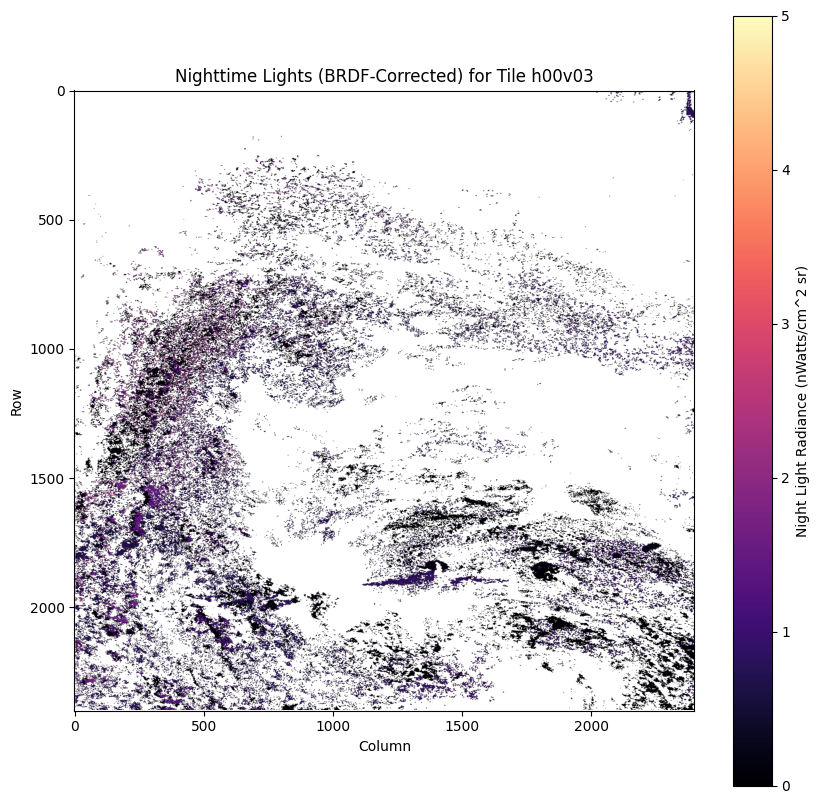

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.imshow(ntl_data_array, cmap='magma', origin='upper',
           vmin=0, vmax=5) # Adjust vmin/vmax based on actual data range for better visualization
plt.colorbar(label='Night Light Radiance (nWatts/cm^2 sr)')
plt.title('Nighttime Lights (BRDF-Corrected) for Tile h00v03')
plt.xlabel('Column')
plt.ylabel('Row')
plt.show()

In [10]:
# Assuming ntl_data_array is already loaded from your HDF5 file
# If you are running this in a new cell, make sure ntl_data_array was defined in a previously executed cell
# in the same Colab session.

if ntl_data_array is not None:
    print("\n--- Top 5 Rows of Nighttime Lights Data (Processed) ---")
    print(ntl_data_array[0:5, :]) # This selects rows from index 0 up to (but not including) 5, and all columns
else:
    print("Error: ntl_data_array is not loaded. Please run the data loading code first.")


--- Top 5 Rows of Nighttime Lights Data (Processed) ---
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


Attempting to process file: VNP46A2.A2023001.h00v03.002.2025135151839.h5 from /content/VNP46A2.A2023001.h00v03.002.2025135151839.h5

--- Sample 100x100 pixel data (RAW, before NaN conversion) ---
[[-999.9 -999.9 -999.9 ... -999.9 -999.9 -999.9]
 [-999.9 -999.9 -999.9 ... -999.9 -999.9 -999.9]
 [-999.9 -999.9 -999.9 ... -999.9 -999.9 -999.9]
 ...
 [-999.9 -999.9 -999.9 ... -999.9 -999.9 -999.9]
 [-999.9 -999.9 -999.9 ... -999.9 -999.9 -999.9]
 [-999.9 -999.9 -999.9 ... -999.9 -999.9 -999.9]]
Note: -999.9 is the fill value.

--- Sample 100x100 pixel data (PROCESSED, after NaN conversion) ---
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]

--- Details for dataset: 'HDFEOS/GRIDS/VIIRS_Grid_DNB_2d/Data Fields/DNB_BRDF-Corrected_NTL' ---
Shape (dimensions): (2400, 2400)
Data type: float32

--- Attributes (metadata) of the NTL dataset ---
- _FillValu

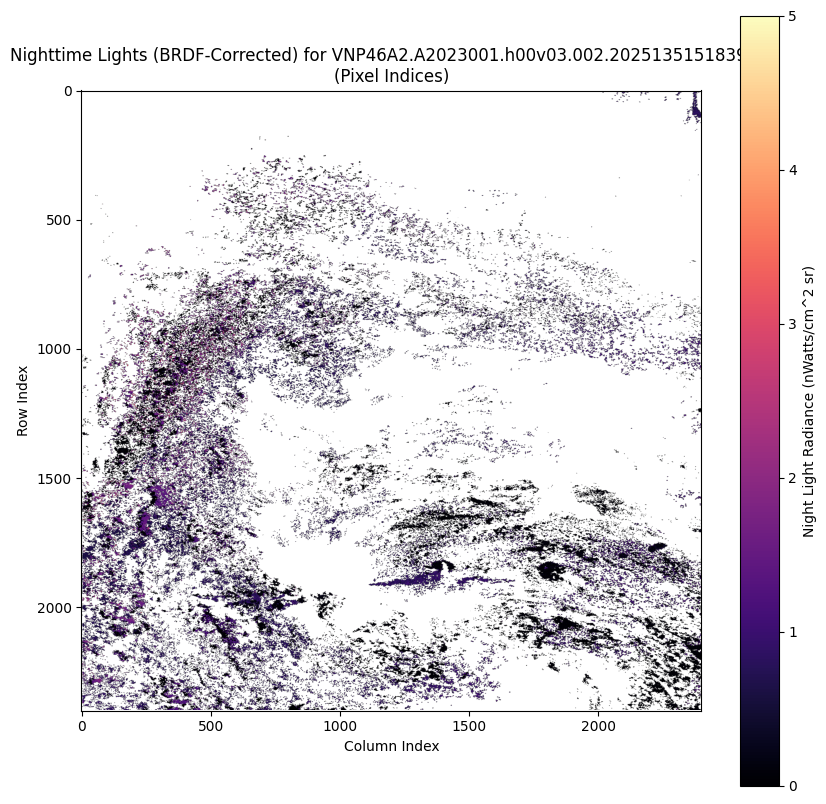

In [11]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

# --- Configure your file path (assuming file is already uploaded) ---
file_name = 'VNP46A2.A2023001.h00v03.002.2025135151839.h5'
file_path = f'/content/{file_name}'

print(f"Attempting to process file: {file_name} from {file_path}")

try:
    with h5py.File(file_path, 'r') as f:
        # --- Accessing the DNB_BRDF-Corrected_NTL dataset ---
        ntl_dataset_path = 'HDFEOS/GRIDS/VIIRS_Grid_DNB_2d/Data Fields/DNB_BRDF-Corrected_NTL'

        if ntl_dataset_path in f:
            ntl_data = f[ntl_dataset_path]

            # --- View the raw data (before replacing -999.9 with NaN) ---
            raw_ntl_data_array = ntl_data[:] # Read all data as is
            print(f"\n--- Sample 100x100 pixel data (RAW, before NaN conversion) ---")
            print(raw_ntl_data_array[0:100, 0:100])
            print(f"Note: -999.9 is the fill value.")

            # --- Now, process it by replacing fill values with NaN for analysis/plotting ---
            ntl_data_array = raw_ntl_data_array.copy() # Make a copy to modify
            fill_value = ntl_data.attrs.get('_FillValue', -999.9)
            ntl_data_array[ntl_data_array == fill_value] = np.nan

            print(f"\n--- Sample 100x100 pixel data (PROCESSED, after NaN conversion) ---")
            print(ntl_data_array[0:100, 0:100])


            # --- Rest of the code for attributes, lat/lon, and visualization (as before) ---
            print(f"\n--- Details for dataset: '{ntl_dataset_path}' ---")
            print(f"Shape (dimensions): {ntl_data.shape}")
            print(f"Data type: {ntl_data.dtype}")

            print("\n--- Attributes (metadata) of the NTL dataset ---")
            for attr_name, attr_value in ntl_data.attrs.items():
                print(f"- {attr_name}: {attr_value}")

            lat_data = f['HDFEOS/GRIDS/VIIRS_Grid_DNB_2d/Data Fields/lat']
            lon_data = f['HDFEOS/GRIDS/VIIRS_Grid_DNB_2d/Data Fields/lon']
            print(f"\nLat data shape: {lat_data.shape}")
            print(f"Lon data shape: {lon_data.shape}")

        else:
            print(f"\nError: Dataset '{ntl_dataset_path}' not found in the HDF5 file.")

except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

# --- Visualize the Data (only runs if ntl_data_array was successfully loaded) ---
if ntl_data_array is not None:
    print("\n--- Generating Visualization ---")
    plt.figure(figsize=(10, 10))

    plt.imshow(ntl_data_array, cmap='magma', origin='upper',
               vmin=0, vmax=5) # Adjust vmin/vmax based on actual range for clarity

    plt.colorbar(label='Night Light Radiance (nWatts/cm^2 sr)')
    plt.title(f'Nighttime Lights (BRDF-Corrected) for {file_name}\n(Pixel Indices)')
    plt.xlabel('Column Index')
    plt.ylabel('Row Index')
    plt.show()
else:
    print("\nVisualization skipped: NTL data array was not loaded successfully. Check errors above.")

Attempting to process file: VNP46A2.A2023001.h00v03.002.2025135151839.h5 from /content/VNP46A2.A2023001.h00v03.002.2025135151839.h5

--- Sample 100x100 pixel data (RAW, before NaN conversion) ---
[[-999.9 -999.9 -999.9 ... -999.9 -999.9 -999.9]
 [-999.9 -999.9 -999.9 ... -999.9 -999.9 -999.9]
 [-999.9 -999.9 -999.9 ... -999.9 -999.9 -999.9]
 ...
 [-999.9 -999.9 -999.9 ... -999.9 -999.9 -999.9]
 [-999.9 -999.9 -999.9 ... -999.9 -999.9 -999.9]
 [-999.9 -999.9 -999.9 ... -999.9 -999.9 -999.9]]
Note: -999.9 is the fill value.

--- Sample 100x100 pixel data (PROCESSED, after NaN conversion) ---
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]

--- Details for dataset: 'HDFEOS/GRIDS/VIIRS_Grid_DNB_2d/Data Fields/DNB_BRDF-Corrected_NTL' ---
Shape (dimensions): (2400, 2400)
Data type: float32

--- Attributes (metadata) of the NTL dataset ---
- _FillValu

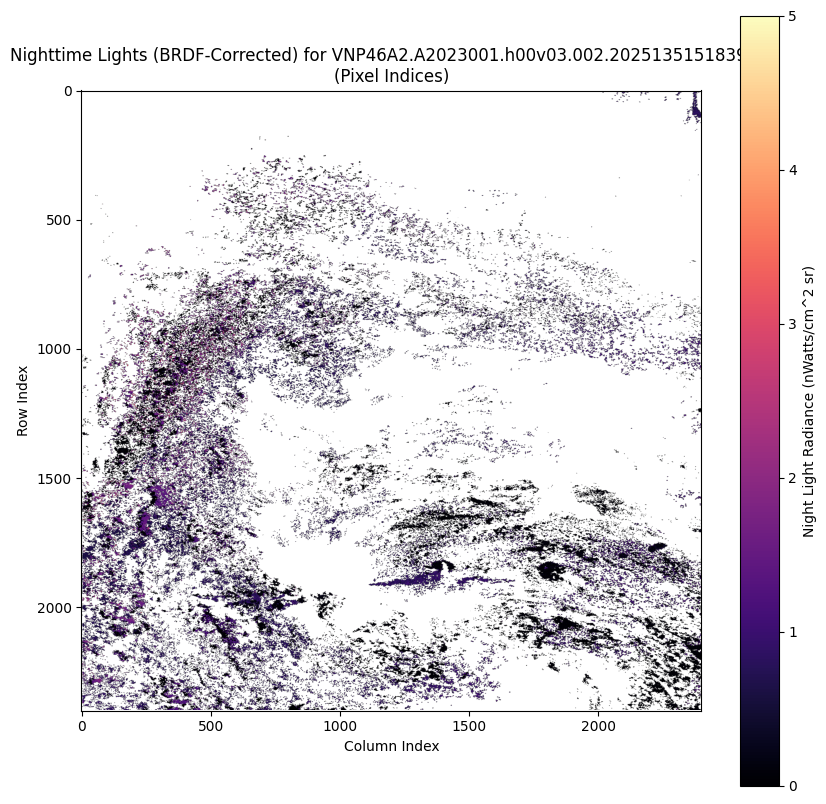

In [12]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

# --- Configure your file path (assuming file is already uploaded) ---
file_name = 'VNP46A2.A2023001.h00v03.002.2025135151839.h5'
file_path = f'/content/{file_name}'

print(f"Attempting to process file: {file_name} from {file_path}")

try:
    with h5py.File(file_path, 'r') as f:
        # --- Accessing the DNB_BRDF-Corrected_NTL dataset ---
        ntl_dataset_path = 'HDFEOS/GRIDS/VIIRS_Grid_DNB_2d/Data Fields/DNB_BRDF-Corrected_NTL'

        if ntl_dataset_path in f:
            ntl_data = f[ntl_dataset_path]

            # --- View the raw data (before replacing -999.9 with NaN) ---
            raw_ntl_data_array = ntl_data[:] # Read all data as is
            print(f"\n--- Sample 100x100 pixel data (RAW, before NaN conversion) ---")
            print(raw_ntl_data_array[0:100, 0:100])
            print(f"Note: -999.9 is the fill value.")

            # --- Now, process it by replacing fill values with NaN for analysis/plotting ---
            ntl_data_array = raw_ntl_data_array.copy() # Make a copy to modify
            fill_value = ntl_data.attrs.get('_FillValue', -999.9)
            ntl_data_array[ntl_data_array == fill_value] = np.nan

            print(f"\n--- Sample 100x100 pixel data (PROCESSED, after NaN conversion) ---")
            print(ntl_data_array[0:100, 0:100])


            # --- Rest of the code for attributes, lat/lon, and visualization (as before) ---
            print(f"\n--- Details for dataset: '{ntl_dataset_path}' ---")
            print(f"Shape (dimensions): {ntl_data.shape}")
            print(f"Data type: {ntl_data.dtype}")

            print("\n--- Attributes (metadata) of the NTL dataset ---")
            for attr_name, attr_value in ntl_data.attrs.items():
                print(f"- {attr_name}: {attr_value}")

            lat_data = f['HDFEOS/GRIDS/VIIRS_Grid_DNB_2d/Data Fields/lat']
            lon_data = f['HDFEOS/GRIDS/VIIRS_Grid_DNB_2d/Data Fields/lon']
            print(f"\nLat data shape: {lat_data.shape}")
            print(f"Lon data shape: {lon_data.shape}")

        else:
            print(f"\nError: Dataset '{ntl_dataset_path}' not found in the HDF5 file.")

except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

# --- Visualize the Data (only runs if ntl_data_array was successfully loaded) ---
if ntl_data_array is not None:
    print("\n--- Generating Visualization ---")
    plt.figure(figsize=(10, 10))

    plt.imshow(ntl_data_array, cmap='magma', origin='upper',
               vmin=0, vmax=5) # Adjust vmin/vmax based on actual range for clarity

    plt.colorbar(label='Night Light Radiance (nWatts/cm^2 sr)')
    plt.title(f'Nighttime Lights (BRDF-Corrected) for {file_name}\n(Pixel Indices)')
    plt.xlabel('Column Index')
    plt.ylabel('Row Index')
    plt.show()
else:
    print("\nVisualization skipped: NTL data array was not loaded successfully. Check errors above.")